In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!curl -O https://www.dhs.gov/sites/default/files/publications/claims-2014.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  629k  100  629k    0     0   245k      0  0:00:02  0:00:02 --:--:--  245k


In [4]:
df = pd.read_excel('claims-2014.xls', index_col='Claim Number')

In [7]:
df.head()

,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
Claim Number,,,,,,,,,,
2013081805991,2014-01-13,2012-12-21 00:00:00,HPN,"Westchester County, White Plains",USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,0,Deny
2014080215586,2014-07-17,2014-06-30 18:38:00,MCO,Orlando International Airport,Delta Air Lines,Property Damage,Checked Baggage,-,0,Deny
2014010710583,2014-01-07,2013-12-27 22:00:00,SJU,Luis Munoz Marin International,Jet Blue,Property Damage,Checked Baggage,Food & Drink,50,Approve in Full
2014010910683,2014-01-07,2014-01-02 00:00:00,IAD,Washington Dulles International,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,0,Deny
2014011310783,2014-01-09,2014-01-07 00:00:00,SAT,San Antonio International,Southwest Airlines,Property Damage,Checked Baggage,Computer & Accessories,0,Deny


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8855 entries, 2013081805991 to 2015012220083
Data columns (total 10 columns):
Date Received    8855 non-null datetime64[ns]
Incident Date    8855 non-null datetime64[ns]
Airport Code     8855 non-null object
Airport Name     8855 non-null object
Airline Name     8855 non-null object
Claim Type       8855 non-null object
Claim Site       8855 non-null object
Item Category    8855 non-null object
Close Amount     8855 non-null object
Disposition      8855 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 761.0+ KB


In [9]:
df.columns

Index(['Date Received', 'Incident Date', 'Airport Code', 'Airport Name',
       'Airline Name', 'Claim Type', 'Claim Site', 'Item Category',
       'Close Amount', 'Disposition'],
      dtype='object')

In [13]:
df['Claim Type'].head()

Claim Number
2013081805991    Personal Injury
2014080215586    Property Damage
2014010710583    Property Damage
2014010910683    Property Damage
2014011310783    Property Damage
Name: Claim Type, dtype: object

In [17]:
df.dtypes

Date Received    datetime64[ns]
Incident Date    datetime64[ns]
Airport Code             object
Airport Name             object
Airline Name             object
Claim Type               object
Claim Site               object
Item Category            object
Close Amount             object
Disposition              object
dtype: object

In [19]:
grp = df.groupby(by=df['Incident Date'].dt.hour)

In [24]:
grp['Item Category'].count()

Incident Date
0     3421
1        6
2       11
3        5
4       49
5      257
6      357
7      343
8      299
9      305
10     349
11     343
12     363
13     359
14     386
15     376
16     351
17     307
18     289
19     241
20     163
21     104
22     106
23      65
Name: Item Category, dtype: int64

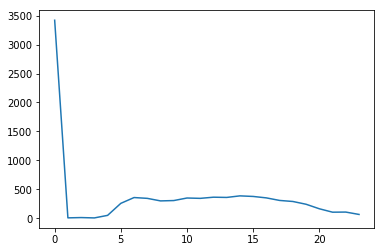

In [25]:
x = grp['Item Category'].describe()


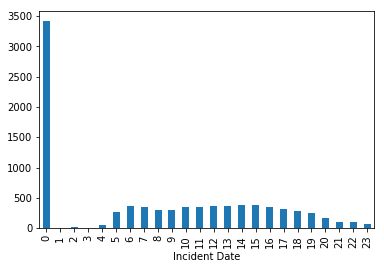

In [30]:
grp['Item Category'].count().plot.bar()

In [31]:
df['Close Amount'].head()

Claim Number
2013081805991     0
2014080215586     0
2014010710583    50
2014010910683     0
2014011310783     0
Name: Close Amount, dtype: object

In [32]:
df['Close Amount'].tail()

Claim Number
2015010219514      0
2015010219516    800
2015010219535      0
2015010819728    256
2015012220083      -
Name: Close Amount, dtype: object

In [36]:
def dash_to_zero(x):
    if '-' in str(x):
        return float() #0.0
    else:
        return x

0.0

In [40]:
df['Close Amount'] = df['Close Amount'].apply(dash_to_zero).tail()
df['Close Amount'].dtype

dtype('float64')

In [41]:
df['Close Amount'].dtype

dtype('float64')

In [43]:
df['Close Amount'].apply(lambda x: 0. if '-' in str(x) else x)

Claim Number
2013081805991      NaN
2014080215586      NaN
2014010710583      NaN
2014010910683      NaN
2014011310783      NaN
                 ...  
2015010219514      0.0
2015010219516    800.0
2015010219535      0.0
2015010819728    256.0
2015012220083      0.0
Name: Close Amount, Length: 8855, dtype: float64

In [44]:
df['Close Amount'].dtype

dtype('float64')